In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data = fetch_california_housing()

In [3]:
df  =pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

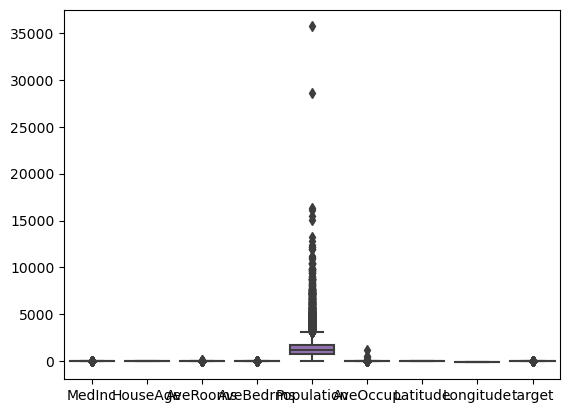

In [6]:
sns.boxplot(df)

<Axes: ylabel='Density'>

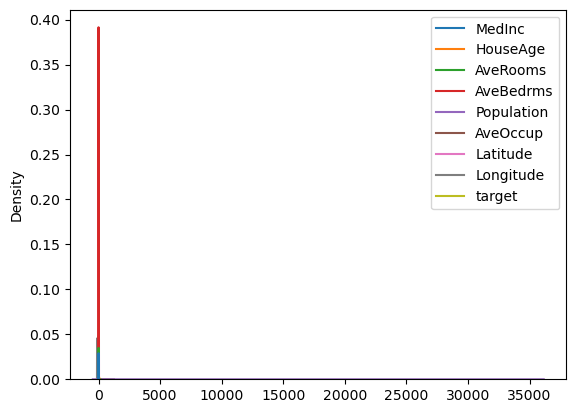

In [7]:
sns.kdeplot(df)

In [8]:
df = df.drop(columns= ["Latitude","Longitude"],axis= 1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [9]:
x = df.drop("target",axis= 1)
y= df["target"]

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=45)

# scaling

In [11]:
sc = StandardScaler()

In [12]:
x_train = sc.fit_transform(x_train,y_train)
y_test = sc.transform(x_test)

<Axes: ylabel='Density'>

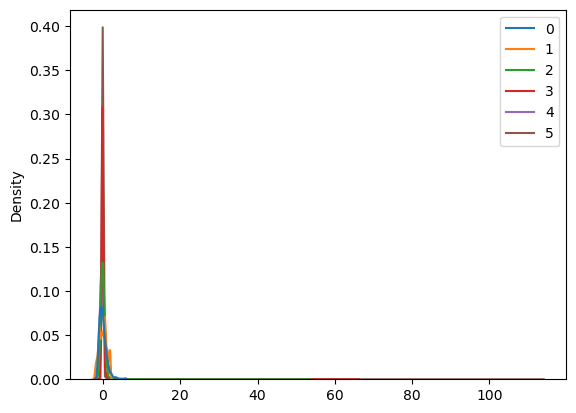

In [13]:
sns.kdeplot(x_train)

<Axes: >

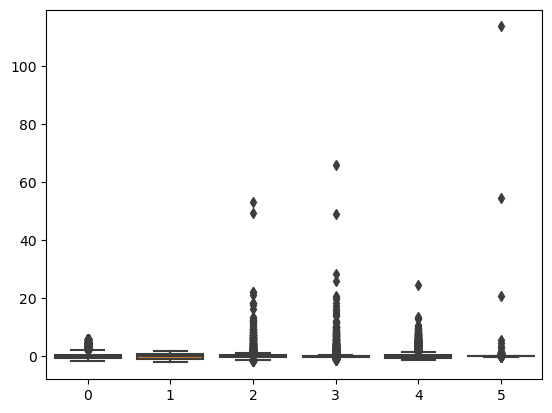

In [14]:
sns.boxplot(x_train)

# outliers

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   target      20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


# column 1

<Axes: xlabel='MedInc'>

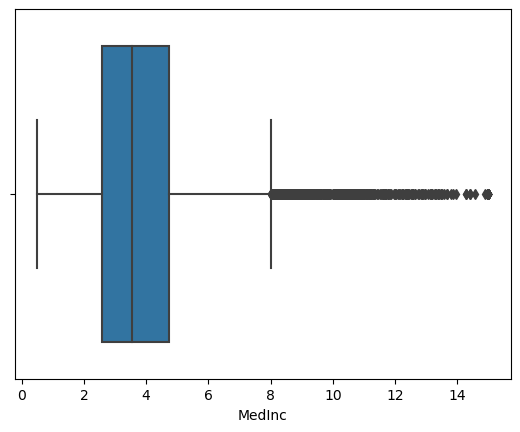

In [17]:
sns.boxplot(x=df["MedInc"])

In [58]:
a= df.loc[np.where(df["MedInc"]>3)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.793547,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,1.793547,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.793547,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.793547,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.793547,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20625,4.1250,37.0,7.285714,1.793547,29.0,2.071429,0.720
20630,3.5673,11.0,5.932584,1.793547,1257.0,2.824719,1.120
20631,3.5179,15.0,6.145833,1.793547,1200.0,2.777778,1.072
20632,3.1250,15.0,6.023377,1.793547,1047.0,2.719481,1.156


# column 2

<Axes: xlabel='HouseAge'>

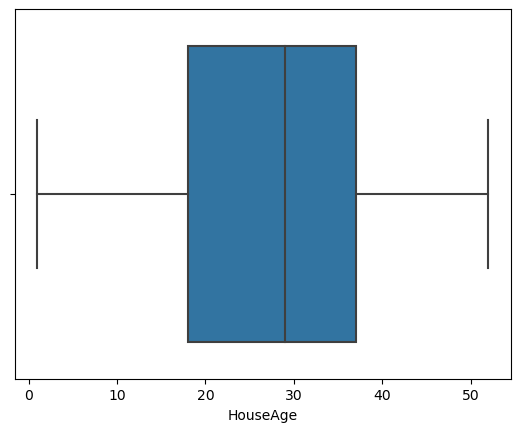

In [18]:
sns.boxplot(x=df["HouseAge"])

# column 3

<Axes: xlabel='AveRooms'>

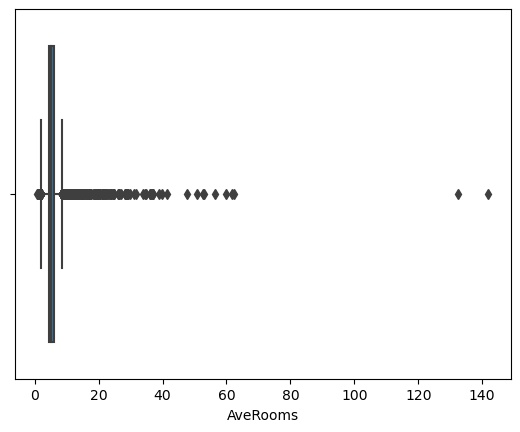

In [19]:
sns.boxplot(x=df["AveRooms"])

<Axes: xlabel='AveRooms', ylabel='Density'>

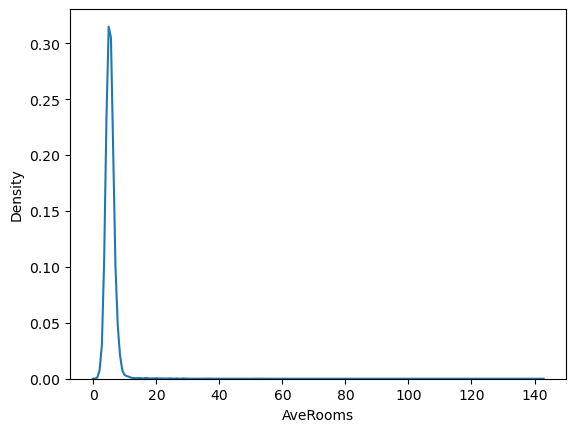

In [20]:
sns.kdeplot(df["AveRooms"])

In [21]:
from scipy.stats import boxcox

In [22]:
AveRooms = boxcox(df["AveRooms"])
AveRooms

(array([1.47534996, 1.41097764, 1.56886594, ..., 1.30322965, 1.31757456,
        1.30897227]),
 -0.2980048976549959)

<Axes: >

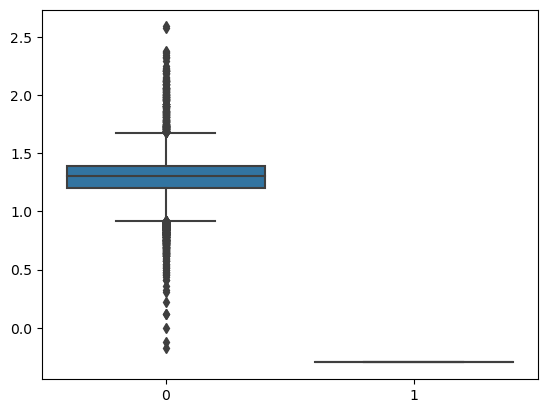

In [23]:
sns.boxplot( AveRooms)

In [24]:
q1 =df["AveRooms"].quantile(0.25)
q3 =df["AveRooms"].quantile(0.75)

iqr = q3-q1
upper_tail = q3+1.5*iqr
lower_tail = q3-1.5*iqr
print(upper_tail)
print(lower_tail)

8.469878027106942
3.6348838776549623


In [25]:
df['AveRooms'] = np.where(df['AveRooms']>upper_tail,upper_tail,np.where(df['AveRooms']<lower_tail,lower_tail,df['AveRooms']))
df['AveRooms']

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: AveRooms, Length: 20640, dtype: float64

<Axes: xlabel='AveRooms'>

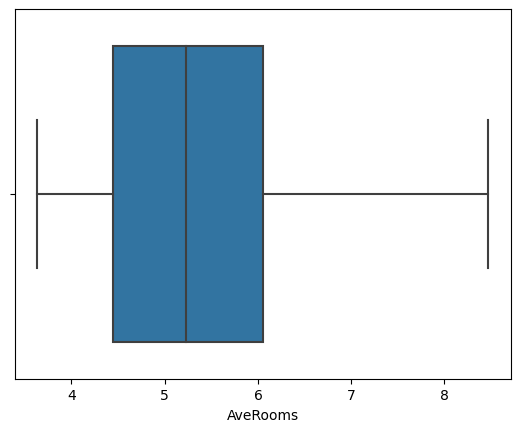

In [26]:
sns.boxplot(x=df["AveRooms"])

# colulmn 4 

<Axes: xlabel='AveBedrms'>

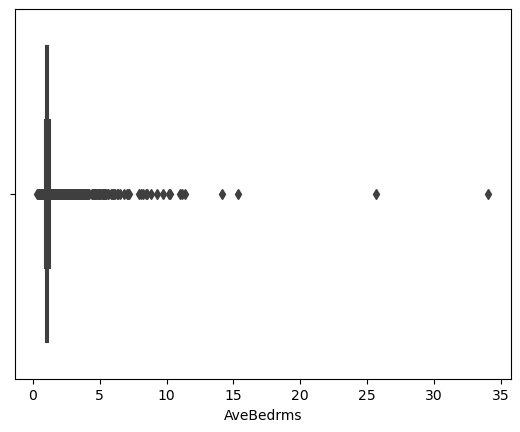

In [27]:
sns.boxplot(x=df["AveBedrms"])

<Axes: xlabel='AveBedrms', ylabel='Density'>

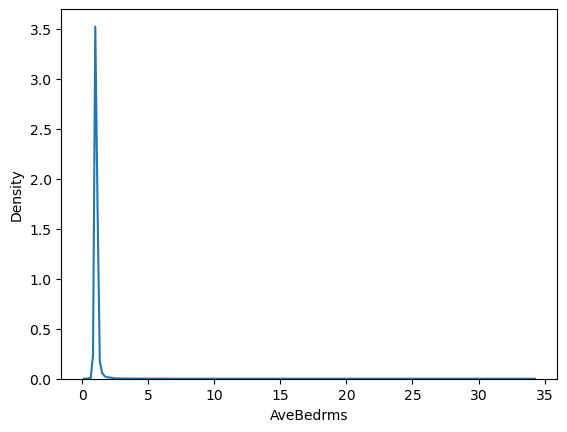

In [28]:
sns.kdeplot(df["AveBedrms"])

In [29]:
q1 =df["AveBedrms"].quantile(0.25)
q3 =df["AveBedrms"].quantile(0.75)

iqr = q3-q1
upper_tail = q3+3*iqr
lower_tail = q3-3*iqr
print(upper_tail)
print(lower_tail)

1.3798671272874095
0.8191850054140124


In [30]:
df['AveBedrms'] = np.where(df['AveBedrms']>upper_tail,upper_tail,np.where(df['AveBedrms']<lower_tail,lower_tail,df['AveBedrms']))
df['AveBedrms']

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: AveBedrms, Length: 20640, dtype: float64

<Axes: xlabel='AveBedrms'>

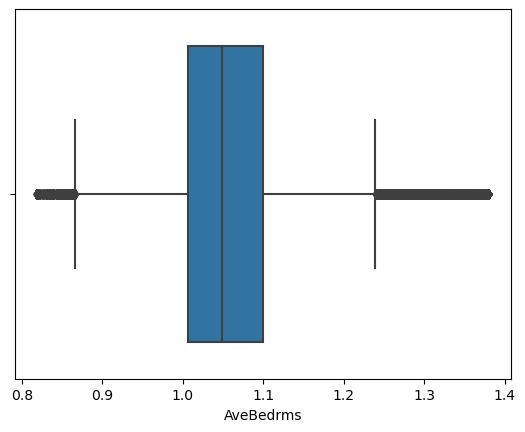

In [31]:
sns.boxplot(x=df["AveBedrms"])

In [32]:
mean = np.where((df['AveRooms']<upper_tail) | (df['AveRooms']>lower_tail))
mean


(array([    0,     1,     2, ..., 20637, 20638, 20639], dtype=int64),)

In [33]:
df['AveBedrms'] = np.where(df['AveBedrms']>upper_tail,upper_tail,np.where(df['AveBedrms']<lower_tail,lower_tail,df['AveBedrms']))
df['AveBedrms']

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: AveBedrms, Length: 20640, dtype: float64

In [35]:
upper_tail = df['AveBedrms'].mean()+3*df['AveBedrms'].std()
lower_tail = df["AveBedrms"].mean()-3*df['AveBedrms'].std()

In [36]:
upper_tail

8.888711793050808

In [37]:
lower_tail

1.7935467520973258

In [38]:
df['AveBedrms'] = np.where(df['AveBedrms']>upper_tail,upper_tail,np.where(df['AveBedrms']<lower_tail,lower_tail,df['AveBedrms']))
df['AveBedrms']

0        1.793547
1        1.793547
2        1.793547
3        1.793547
4        1.793547
           ...   
20635    1.793547
20636    1.793547
20637    1.793547
20638    1.793547
20639    1.793547
Name: AveBedrms, Length: 20640, dtype: float64

<Axes: >

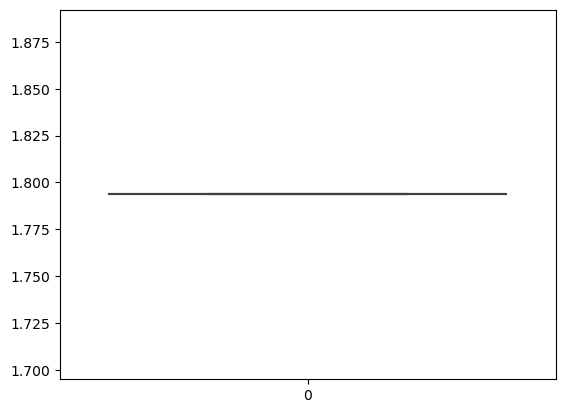

In [40]:
sns.boxplot(df["AveBedrms"])

<Axes: xlabel='AveBedrms', ylabel='Density'>

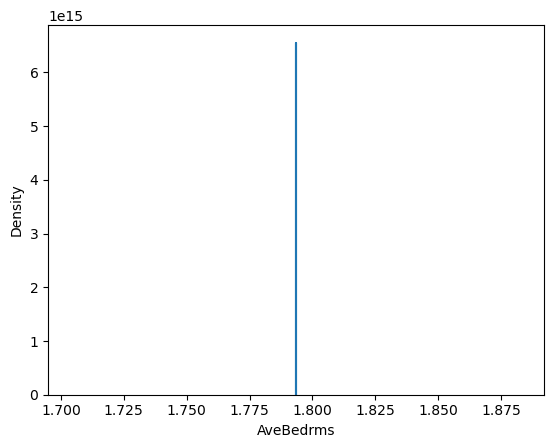

In [41]:
sns.kdeplot(df["AveBedrms"])

<Axes: >

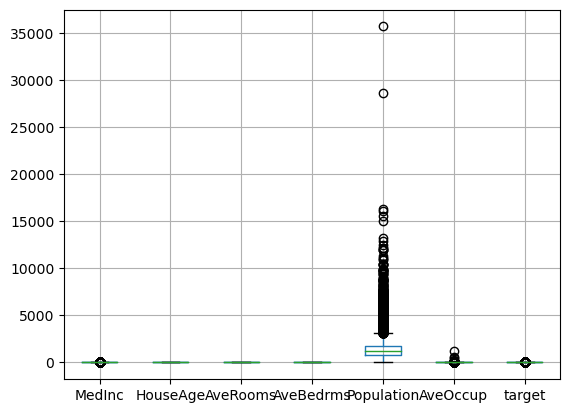

In [42]:
df.boxplot()

# algorithm

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred_train = lr.predict(x_train)

In [ ]:
mse= mean_squared_error(y_train,y_pred_train)
mae =mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
r2